# Intro to HDF5 data model

High-level overview of the HDF5 file structure and basic tools

![hdf5-wheel](images/hdf5-wheel.png)  
Source: © Copyright The HDF Group  

## What is HDF5?

* HDF5 = Hierarchical Data Format Version 5
* A file format optimized for numeric data
* A hierarquichal structure to store information (like folders)
* A self-describing container: Metadata + Data
* A library with several functionalities (e.g. command line tools)
* It is high level from user side (easy access)
* It is low level from machine side (binary, compressible)
* Fast I/O, parallel read/write (!), very good for HPC
* Data can be read/written in chuncks, in-memory, out-of-memory  

Read more: [https://www.hdfgroup.org/solutions/hdf5/](https://www.hdfgroup.org/solutions/hdf5/) 

## How popular is it?

* Matlab `*.m` files **are** HDF5!
* NetCDF4 files **are** HDF5!
* Keras/TensorFlow saves ML model weights to HDF5
* ICESat-2 data comes in HDF5

## Write data to HDF5

Let's create some fake data

In [1]:
%matplotlib inline

In [2]:
import h5py
import numpy as np

x = np.random.randn(100)
y = np.random.randn(100)
z = np.random.randn(100)

print(x)

[ 0.95254412 -0.80202815 -0.06495196 -1.43489649 -0.07595507  0.17995021
 -0.44206968  0.08429215  0.29968965 -0.14986233 -0.97635092 -0.87976614
 -0.55504659 -0.98286413  0.69332231 -0.94365824 -0.44059723  0.95369564
 -2.36663616  1.50351629 -1.64994992  0.57070032  1.76447173 -2.24352861
  1.01514884  1.68490326 -0.88404423  0.63808445 -0.5390766  -0.76072559
 -0.47009079  0.34085482 -0.6604419   0.47999648 -0.8431061   0.57158593
 -0.39582546 -0.07101127  0.28718717 -0.68050568  0.35031921  0.61211776
 -0.50858562  0.29827421 -0.77605021  0.34469811 -0.40481064  0.70978483
  0.14626026 -0.08761335 -1.22406288  0.3132206   0.72911728 -1.88243915
 -0.01170671  0.48163366 -0.3722704  -1.62591522 -0.80724715 -0.7400139
  1.01830533  1.19380516  0.63575511  1.4001936   0.59745426  2.090761
  0.67452757  0.0971604  -0.15906327  2.0675038   0.18612596 -0.94692556
 -0.41986883  0.20831923  0.13621592 -0.50065915  0.29042755 -0.56315103
  2.73323718 -1.20079287 -0.11589488 -0.41231845  0.48

Save 1D arrays to file

In [3]:
with h5py.File('myfile.h5', 'w') as f:  # open file in write mode
    f['x'] = x                          # write data
    f['y'] = y
    f['z'] = z

In [4]:
!ls *.h5  # Check the file was created

myfile.h5


The HDF5 library comes with some useful command-line tools  
There is no need to write code to inspect an HDF5 file!

In [5]:
!h5ls myfile.h5  # inspect the file w/command-line tools

x                        Dataset {100}
y                        Dataset {100}
z                        Dataset {100}


> **NOTE:**  
> We wil see more sophysticated command-line tools below.


## Read data from HDF5

Load data (in memory) vs. get pointer (out of memory)

In [6]:
with h5py.File('myfile.h5', 'r') as f:  # open file
    x = f['x'][:]                       # read data into memory
    y = f['y']                          # get pointer to data on disk
    
    print('x (in mem): ', x)
    print('y (on disk):', y)
    print('')
    print('x (in mem): ', type(x))
    print('y (on disk):', type(y))
    print('')
    print('x (in mem): ', x.shape)
    print('y (on disk):', y.shape)  # same info from out-of-memory array

x (in mem):  [ 0.95254412 -0.80202815 -0.06495196 -1.43489649 -0.07595507  0.17995021
 -0.44206968  0.08429215  0.29968965 -0.14986233 -0.97635092 -0.87976614
 -0.55504659 -0.98286413  0.69332231 -0.94365824 -0.44059723  0.95369564
 -2.36663616  1.50351629 -1.64994992  0.57070032  1.76447173 -2.24352861
  1.01514884  1.68490326 -0.88404423  0.63808445 -0.5390766  -0.76072559
 -0.47009079  0.34085482 -0.6604419   0.47999648 -0.8431061   0.57158593
 -0.39582546 -0.07101127  0.28718717 -0.68050568  0.35031921  0.61211776
 -0.50858562  0.29827421 -0.77605021  0.34469811 -0.40481064  0.70978483
  0.14626026 -0.08761335 -1.22406288  0.3132206   0.72911728 -1.88243915
 -0.01170671  0.48163366 -0.3722704  -1.62591522 -0.80724715 -0.7400139
  1.01830533  1.19380516  0.63575511  1.4001936   0.59745426  2.090761
  0.67452757  0.0971604  -0.15906327  2.0675038   0.18612596 -0.94692556
 -0.41986883  0.20831923  0.13621592 -0.50065915  0.29042755 -0.56315103
  2.73323718 -1.20079287 -0.11589488 -0.4

## Append data to HDF5

Let's add some data with specific paths (groups)

In [7]:
with h5py.File('myfile.h5', 'a') as f:
    f['/path/to/data/vec'] = z**2
    f['/path/to/data/mat'] = z.reshape(10,10)

> **NOTE:**  
> `path`, `to` and `data` are groups  
> `vec` and `mat` are datasets  

In [8]:
# Inspect file from the command line
!h5ls -r myfile.h5

/                        Group
/path                    Group
/path/to                 Group
/path/to/data            Group
/path/to/data/mat        Dataset {10, 10}
/path/to/data/vec        Dataset {100}
/x                       Dataset {100}
/y                       Dataset {100}
/z                       Dataset {100}


Now our HDF5 file has some structure!

## Add metadata to HDF5

Let's first inpect the metadata that's added by default

In [9]:
# Inspect Metadate from the commaand line
!h5dump -H myfile.h5

HDF5 "myfile.h5" {
GROUP "/" {
   GROUP "path" {
      GROUP "to" {
         GROUP "data" {
            DATASET "mat" {
               DATATYPE  H5T_IEEE_F64LE
               DATASPACE  SIMPLE { ( 10, 10 ) / ( 10, 10 ) }
            }
            DATASET "vec" {
               DATATYPE  H5T_IEEE_F64LE
               DATASPACE  SIMPLE { ( 100 ) / ( 100 ) }
            }
         }
      }
   }
   DATASET "x" {
      DATATYPE  H5T_IEEE_F64LE
      DATASPACE  SIMPLE { ( 100 ) / ( 100 ) }
   }
   DATASET "y" {
      DATATYPE  H5T_IEEE_F64LE
      DATASPACE  SIMPLE { ( 100 ) / ( 100 ) }
   }
   DATASET "z" {
      DATATYPE  H5T_IEEE_F64LE
      DATASPACE  SIMPLE { ( 100 ) / ( 100 ) }
   }
}
}


Let's add our own metadata

In [10]:
with h5py.File('myfile.h5', 'a') as f:
    g = f['/path']               # pointer to group 'path'
    d = f['/path/to/data/mat']   # pointer to dataset 'mat'
    
    # Metadata for the group
    g.attrs['Description'] = 'This is a group'
    g.attrs['Author'] = 'Your name'
    g.attrs['email'] = 'yourname@domain.com'
    
    # Metadata for the data
    d.attrs['Description'] = 'This is an array'
    d.attrs['Date'] = '2020-07-01'
    d.attrs['Version'] = '1.2'

In [11]:
# Inspect Metadata from the commaand line
!h5dump --header myfile.h5

HDF5 "myfile.h5" {
GROUP "/" {
   GROUP "path" {
      ATTRIBUTE "Author" {
         DATATYPE  H5T_STRING {
            STRSIZE H5T_VARIABLE;
            STRPAD H5T_STR_NULLTERM;
            CSET H5T_CSET_UTF8;
            CTYPE H5T_C_S1;
         }
         DATASPACE  SCALAR
      }
      ATTRIBUTE "Description" {
         DATATYPE  H5T_STRING {
            STRSIZE H5T_VARIABLE;
            STRPAD H5T_STR_NULLTERM;
            CSET H5T_CSET_UTF8;
            CTYPE H5T_C_S1;
         }
         DATASPACE  SCALAR
      }
      ATTRIBUTE "email" {
         DATATYPE  H5T_STRING {
            STRSIZE H5T_VARIABLE;
            STRPAD H5T_STR_NULLTERM;
            CSET H5T_CSET_UTF8;
            CTYPE H5T_C_S1;
         }
         DATASPACE  SCALAR
      }
      GROUP "to" {
         GROUP "data" {
            DATASET "mat" {
               DATATYPE  H5T_IEEE_F64LE
               DATASPACE  SIMPLE { ( 10, 10 ) / ( 10, 10 ) }
               ATTRIBUTE "Date" {
                  DATATYPE  H5T_S

## Copy some data to another HDF5

In [12]:
%%bash

h5copy -i myfile.h5 -o myfile2.h5 -s x -d x

h5copy -i myfile.h5 -o myfile2.h5 -s /path/to/data/mat -d mat

ls *.h5
h5ls -r myfile2.h5

myfile.h5
myfile2.h5
/                        Group
/mat                     Dataset {10, 10}
/x                       Dataset {100}


Let's check the differences between original and copy files 

In [13]:
!h5diff -v myfile.h5 myfile2.h5


file1     file2
---------------------------------------
    x      x    /              
           x    /mat           
    x           /path          
    x           /path/to       
    x           /path/to/data  
    x           /path/to/data/mat
    x           /path/to/data/vec
    x      x    /x             
    x           /y             
    x           /z             

group  : </> and </>
0 differences found
dataset: </x> and </x>
0 differences found


## Inspect HDF5 from Python

Let's do the same as above but using Python code

In [14]:
f = h5py.File('myfile.h5', 'r')  # keep it open

print(f.keys())  # Inspect base groups quickly

<KeysViewHDF5 ['path', 'x', 'y', 'z']>


Inspect the full structure w/metadata

In [15]:
def print_attrs(name, obj):
    print(name)
    for key, val in obj.attrs.items():
        print("    %s: %s" % (key, val))

f.visititems(print_attrs)        

path
    Author: Your name
    Description: This is a group
    email: yourname@domain.com
path/to
path/to/data
path/to/data/mat
    Date: 2020-07-01
    Description: This is an array
    Version: 1.2
path/to/data/vec
x
y
z


In [16]:
f.close()

## Create an extendable dataset

Create an empty container (called `grids`) extendable in the 3rd dim

In [17]:
with h5py.File('myfile.h5', 'a') as f:
    dset = f.create_dataset(
        "grids", 
        (10,10,5), 
        maxshape=(10,10,None), 
        dtype='f4', 
        chunks=True,
        compression='gzip')

Check that our created container has an infinity dimension

In [18]:
!h5ls -r myfile.h5

/                        Group
/grids                   Dataset {10, 10, 5/Inf}
/path                    Group
/path/to                 Group
/path/to/data            Group
/path/to/data/mat        Dataset {10, 10}
/path/to/data/vec        Dataset {100}
/x                       Dataset {100}
/y                       Dataset {100}
/z                       Dataset {100}


Create a bunch of 2D grids to save to our empty container

In [19]:
mygrids = [np.random.randn(10,10) for _ in range(5)]

print(np.shape(mygrids))  # 5 grids of 10 by 10

(5, 10, 10)


Save grids one at a time and close the file

In [20]:
with h5py.File('myfile.h5', 'a') as f:
    grids = f['grids']
    
    for k,g in enumerate(mygrids):
        grids[:,:,k] = g

Read in (select) specific grids with fancy indexing

In [21]:
with h5py.File('myfile.h5', 'r') as f:
    mygrids = f['grids'][:,:,[0,2,4]]  # 3 grids out of 5
    
print(np.shape(mygrids))

(10, 10, 3)


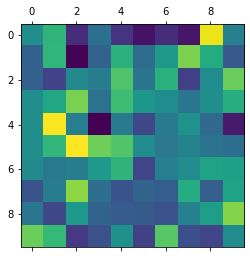

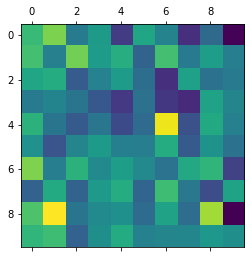

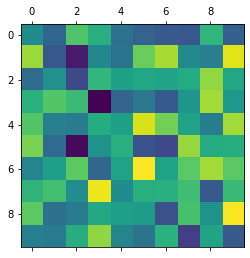

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot each grid to check dimensions are right
[plt.matshow(mygrids[:,:,k]) for k in range(mygrids.shape[2])]
plt.show()

## What about the cloud?

The HDF Group (the organization behind HDF5) offers a cloud solution for HDF5:

- [Highly Scalable Data Service (HSDS)](https://www.hdfgroup.org/solutions/highly-scalable-data-service-hsds/) - an interface for reading and writing HDF5 within object-based storage environments such as the Cloud.

The HDF Group also offers commercial product services around HSDS:

- [Kita Lab](https://www.hdfgroup.org/hdfkitalab/) - a managed JupyterLab environment with a command line interface (for small groups)
- [Kita Server for AWS Marketplace](https://www.hdfgroup.org/solutions/highly-scalable-data-service-hsds/) - for those using ASW services

## The Zarr library (a newcomer)

![Zarr](images/zarr-logo.png)  
Source: © Copyright Zarr Developers

> Zarr stores each chunk of a dataset as a separate object in Cloud object storage,  
> making it efficient for clusters of CPUs to access the data in parallel.  
> It also allows all the metadata to be in a single location which requires just one read.

How does it compare to HDF5?

- The Zarr data model and library offer the same capabilities as HDF5 + _added functionality_
- Both `zarr` and `h5py` have an (almost) identical interface to access the data
- Zarr is written in Python, and Python oriented. HDF5 is written in C, and cross language
- Zarr is less than 5 years old (young project). HDF5 is over 20 years old (mature project)
- Zarr is being developed from the bottom-up as cloud performant. HDF5 is being adapted

What is the added functionality?

- Many more compression libraries out of the box
- Composible filters (e.g. you can combine different compression algorithms)
- More storage backends (e.g. cloud specific: S3 and Azure mappings)
- Easer to extend (e.g. you can write custom storage backends, in pure Python)
- Native support for multithreading (e.g. concurrent writes to the same file)

Checkout Joe Jevnik's talk about the differences between Zarr and HDF5:

* [Zarr vs. HDF5](https://www.youtube.com/watch?v=-l445lCPTts)

## Final thoughts on HDF5

- Many small files is usually more practical than a few large ones (for processing)
- Read/Write is faster on smaller files (faster queries)
- Network transfer is usually faster with a bunch of smaller files
- Storing a lot of data into a single file is susceptible to corruption
- Many small files simplifies (embarrasingly) parallelization

## Bonus: HDFView Software

If you like GUIs, [HDFView](https://www.hdfgroup.org/downloads/hdfview/) is a visual tool written in Java for browsing and editing HDF5 and HDF4 files. With HDFView you can:

- View a file hierarchy in a tree structure
- Create new files, add or delete groups and datasets
- View and modify the content of a dataset
- Add, delete and modify attributes

![hdfview](images/hdfview.png)